In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as st
from sklearn import ensemble
from datetime import time
from sklearn import preprocessing
import warnings
import calendar
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
from google.colab import drive
import sys
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/US_Accidents_data.csv'
Raw_data = pd.read_csv(path)

In [ ]:
# ===== Display, Info, & Describe ===== #
print(tabulate(Raw_data.head(), headers=Raw_data.columns, tablefmt="grid"))

+----+------+------------+---------------------+---------------------+-------------+-------------+-----------+-----------+----------------+----------------------------------------------------------------------------+----------+-------------+--------+------------+------------+---------+-----------+-----------+------------+----------------+---------------------+------------------+-----------------+---------------+----------------+------------------+------------------+-------------------+---------------------+---------------------+-----------+--------+------------+------------+------------+-----------+-----------+--------------+-----------+--------+-------------------+------------------+----------------+------------------+------------------+---------------------+-------------------------+
|    | ID   |   Severity | Start_Time          | End_Time            |   Start_Lat |   Start_Lng |   End_Lat |   End_Lng |   Distance(mi) | Description                                                    

In [ ]:
print(f'\nNumber of Rows and Columns: {Raw_data.shape}\n')
print(Raw_data.info())


Number of Rows and Columns: (2845342, 47)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperatur

In [ ]:
# ===== Numeric, Categorical, & Binary data ===== #
numeric_data = Raw_data.select_dtypes(include=['int64', 'float64'])
print(f"\nData has {len(numeric_data.columns)} Numeric columns")
print(f"Numeric columns: ", numeric_data.columns.tolist())

categorical_data = Raw_data.select_dtypes(include='object')
print(f"\nData has {len(categorical_data.columns)} Categorical columns")
print(f"Categorical columns: ", categorical_data.columns.tolist())

binary_data = Raw_data.select_dtypes(include='bool')
print(f"\nData has {len(binary_data.columns)} Binary columns")
print(f"Binary columns: ", binary_data.columns.tolist())


Data has 14 Numeric columns
Numeric columns:  ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

Data has 20 Categorical columns
Categorical columns:  ['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Data has 13 Binary columns
Binary columns:  ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']


In [ ]:
print(Raw_data.describe())

          Severity    Start_Lat    Start_Lng      End_Lat      End_Lng  \
count 2845342.0000 2845342.0000 2845342.0000 2845342.0000 2845342.0000   
mean        2.1376      36.2452     -97.1146      36.2453     -97.1144   
std         0.4787       5.3638      18.3178       5.3639      18.3176   
min         1.0000      24.5660    -124.5481      24.5660    -124.5457   
25%         2.0000      33.4452    -118.0331      33.4463    -118.0333   
50%         2.0000      36.0986     -92.4181      36.0980     -92.4177   
75%         2.0000      40.1602     -80.3724      40.1610     -80.3734   
max         4.0000      49.0006     -67.1132      49.0750     -67.1092   

       Distance(mi)       Number  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
count  2845342.0000 1101431.0000    2776068.0000   2375699.0000 2772250.0000   
mean         0.7027    8089.4081         61.7936        59.6582      64.3655   
std          1.5604   18360.0940         18.6226        21.1610      22.8746   
min          

In [ ]:
# ===== Missing values ===== #
mvalues = Raw_data.isna().sum()
x = mvalues.index.tolist()
y = mvalues.values.tolist()
z = (mvalues.values / len(Raw_data) * 100).tolist()
missings = {'Column': x, 'Count': y, 'Percentage': z}
missingvalues = pd.DataFrame(missings)
print("\nMissing value counts and percentages: ")
print(missingvalues)


Missing value counts and percentages: 
                   Column    Count  Percentage
0                      ID        0      0.0000
1                Severity        0      0.0000
2              Start_Time        0      0.0000
3                End_Time        0      0.0000
4               Start_Lat        0      0.0000
5               Start_Lng        0      0.0000
6                 End_Lat        0      0.0000
7                 End_Lng        0      0.0000
8            Distance(mi)        0      0.0000
9             Description        0      0.0000
10                 Number  1743911     61.2900
11                 Street        2      0.0001
12                   Side        0      0.0000
13                   City      137      0.0048
14                 County        0      0.0000
15                  State        0      0.0000
16                Zipcode     1319      0.0464
17                Country        0      0.0000
18               Timezone     3659      0.1286
19           Airport

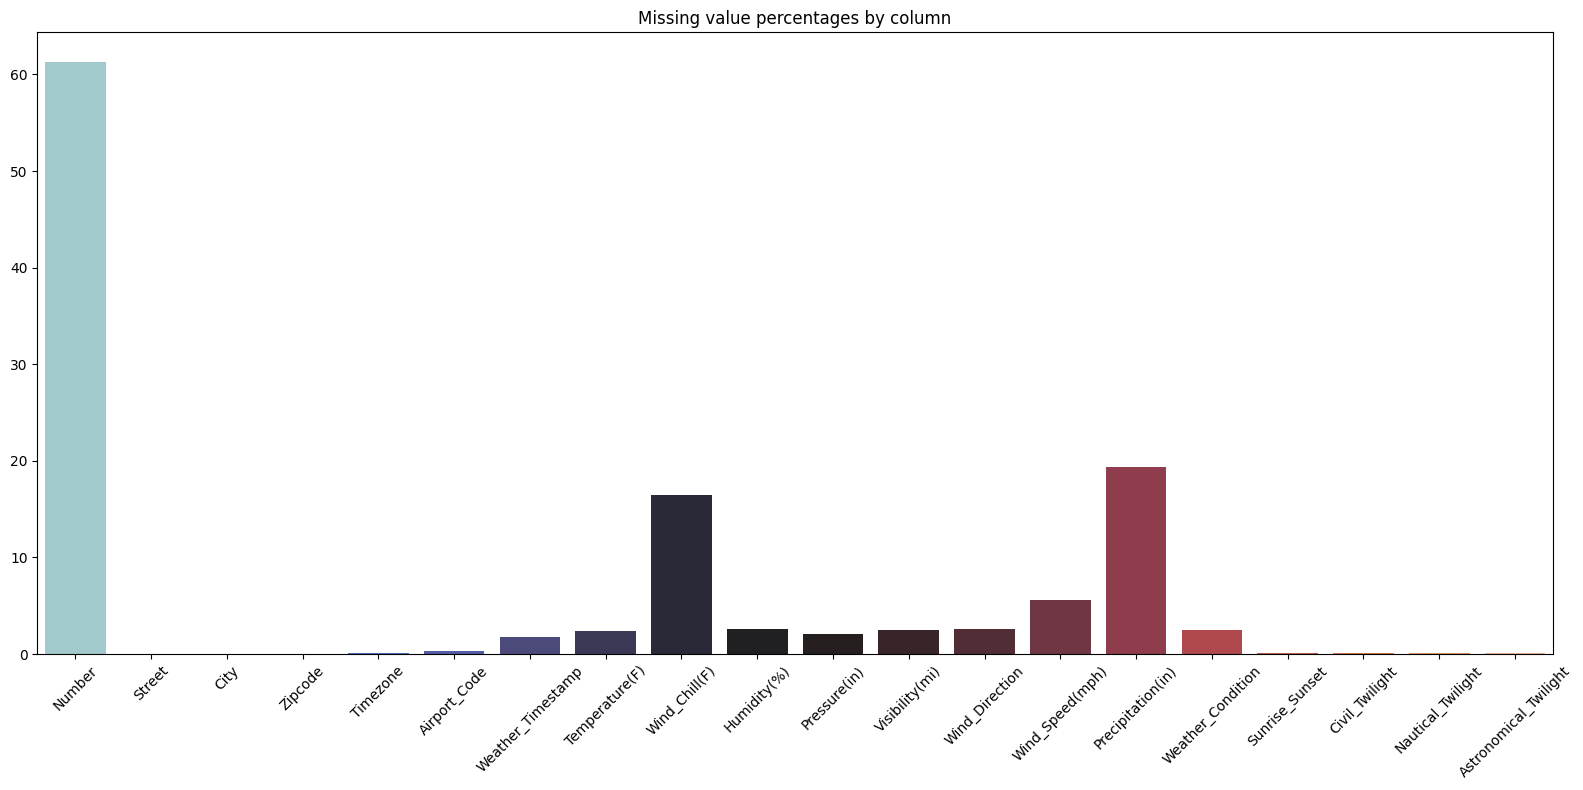

In [ ]:
mvalues2 = mvalues[mvalues != 0]
plt.figure(figsize=(16, 8))
sns.barplot(x=mvalues2.index, y=mvalues2.values / len(Raw_data) * 100, palette="icefire")
plt.xticks(rotation=45)
plt.title("Missing value percentages by column")
plt.tight_layout()
plt.show()

In [ ]:
# ===== DATA PREPROCESSING ===== #
# ===== Selecting columns ===== #
data = Raw_data[['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
                 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                 'Wind_Speed(mph)', 'Precipitation(in)', 'Start_Time', 'End_Time', 'Street',
                 'Side', 'City', 'County', 'State', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
                 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset']].copy()
print(data.shape)

(2845342, 26)


In [ ]:
# ===== Missing values ===== #
print(data.isna().sum())
data.dropna(inplace=True)
print(f"\nNumber of Rows and Columns after handling missing values: {data.shape}")
print(data.isna().sum())

Severity                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Temperature(F)        69274
Wind_Chill(F)        469643
Humidity(%)           73092
Pressure(in)          59200
Visibility(mi)        70546
Wind_Speed(mph)      157944
Precipitation(in)    549458
Start_Time                0
End_Time                  0
Street                    2
Side                      0
City                    137
County                    0
State                     0
Timezone               3659
Airport_Code           9549
Weather_Timestamp     50736
Wind_Direction        73775
Weather_Condition     70636
Sunrise_Sunset         2867
dtype: int64

Number of Rows and Columns after handling missing values: (2207325, 26)
Severity             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Hu

In [ ]:
data2 = data.copy()

In [ ]:
# ===== Date-time variables ===== #
data2['Start_Time'] = pd.to_datetime(data2['Start_Time'])
data2['End_Time'] = pd.to_datetime(data2['End_Time'])
data2['Weather_Timestamp'] = pd.to_datetime(data2['Weather_Timestamp'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207325 entries, 0 to 2845341
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Severity           int64         
 1   Start_Lat          float64       
 2   Start_Lng          float64       
 3   End_Lat            float64       
 4   End_Lng            float64       
 5   Distance(mi)       float64       
 6   Temperature(F)     float64       
 7   Wind_Chill(F)      float64       
 8   Humidity(%)        float64       
 9   Pressure(in)       float64       
 10  Visibility(mi)     float64       
 11  Wind_Speed(mph)    float64       
 12  Precipitation(in)  float64       
 13  Start_Time         datetime64[ns]
 14  End_Time           datetime64[ns]
 15  Street             object        
 16  Side               object        
 17  City               object        
 18  County             object        
 19  State              object        
 20  Timezone           objec

In [ ]:
# ===== Numeric, Categorical, & Binary data ===== #
numeric_data = data2.select_dtypes(include=['int64', 'float64'])
print(f"\nData has {len(numeric_data.columns)} Numeric columns")
print(f"Numeric columns: ", numeric_data.columns.tolist())

categorical_data = data2.select_dtypes(include='object')
print(f"\nData has {len(categorical_data.columns)} Categorical columns")
print(f"Categorical columns: ", categorical_data.columns.tolist())

binary_data = data2.select_dtypes(include='bool')
print(f"\nData has {len(binary_data.columns)} Binary columns")
print(f"Binary columns: ", binary_data.columns.tolist())

datetime_data = data2.select_dtypes(include='datetime64[ns]')
print(f"\nData has {len(datetime_data.columns)} Datetime columns")
print(f"Datetime columns: ", datetime_data.columns.tolist())


Data has 13 Numeric columns
Numeric columns:  ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

Data has 10 Categorical columns
Categorical columns:  ['Street', 'Side', 'City', 'County', 'State', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset']

Data has 0 Binary columns
Binary columns:  []

Data has 3 Datetime columns
Datetime columns:  ['Start_Time', 'End_Time', 'Weather_Timestamp']


Total number of states: 49
States with highest accidents: 
CA    604477
FL    350204
TX    108714
OR     98754
VA     92191
Name: State, dtype: int64
States with lowest accidents: 
NM    1618
ME     964
WY     658
VT     214
SD     154
Name: State, dtype: int64


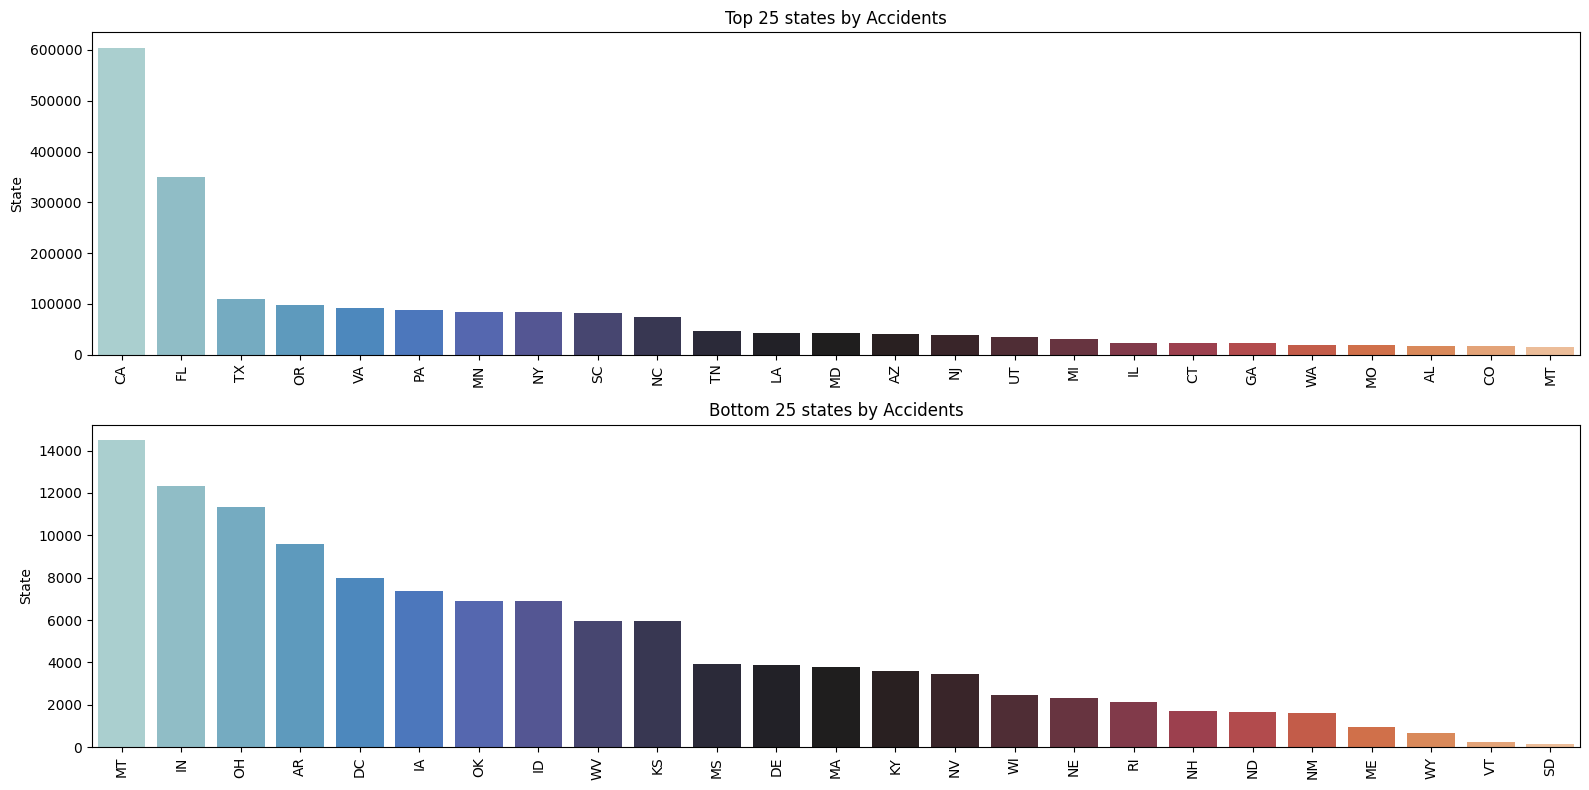

In [ ]:
# ===== Answering questions ===== #
state_count = data["State"].value_counts()
print(f"Total number of states: {len(state_count)}")
print("States with highest accidents: ")
print(state_count.head())
print("================================")
print("States with lowest accidents: ")
print(state_count.tail())

top25 = state_count.head(25)
bottom25 = state_count.tail(25)
plt.figure(figsize = (16, 8))
plt.subplot(2, 1, 1)
sns.barplot(x = top25.index, y = top25, palette="icefire")
plt.xticks(rotation=90)
plt.title('Top 25 states by Accidents')
plt.subplot(2, 1, 2)
sns.barplot(x = bottom25.index, y = bottom25, palette="icefire")
plt.xticks(rotation=90)
plt.title('Bottom 25 states by Accidents')
plt.tight_layout()
plt.show()

Total number of cities: 9723

Cities with highest accidents: 
Miami          97723
Los Angeles    56471
Orlando        49691
Dallas         33052
Houston        28385
Name: City, dtype: int64
Cities with lowest accidents: 
Hilltown                        1
West Gardiner                   1
Chepachet                       1
Maineville                      1
American Fork-Pleasant Grove    1
Name: City, dtype: int64


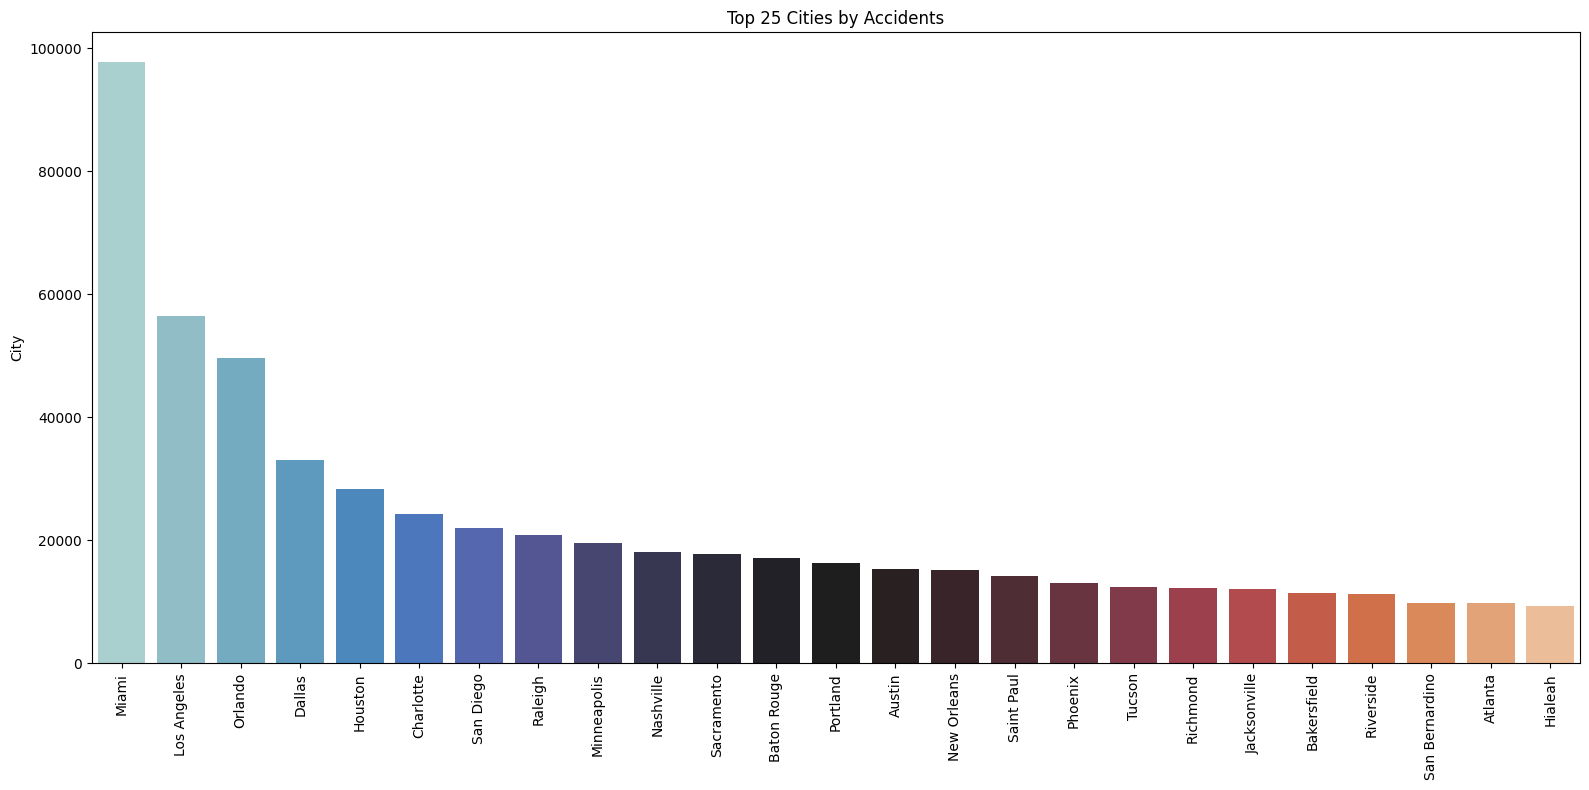

In [ ]:
city_count = data["City"].value_counts()
print(f"Total number of cities: {len(city_count)}")
print("\nCities with highest accidents: ")
print(city_count.head())
print("================================")
print("Cities with lowest accidents: ")
print(city_count.tail())

top25 = city_count.head(25)
plt.figure(figsize = (16, 8))
sns.barplot(x = top25.index, y = top25, palette="icefire")
plt.xticks(rotation=90)
plt.title('Top 25 Cities by Accidents')
plt.tight_layout()
plt.show()

Total number of streets: 142720

Streets with highest accidents: 
I-5 N     29025
I-95 N    28571
I-95 S    27579
I-5 S     25294
I-10 E    18275
Name: Street, dtype: int64
Streets with lowest accidents: 
 Trouble Ln          1
 Servando Ave        1
 Willow St E         1
 Delancy Way         1
473-401 Cutoff Rd    1
Name: Street, dtype: int64


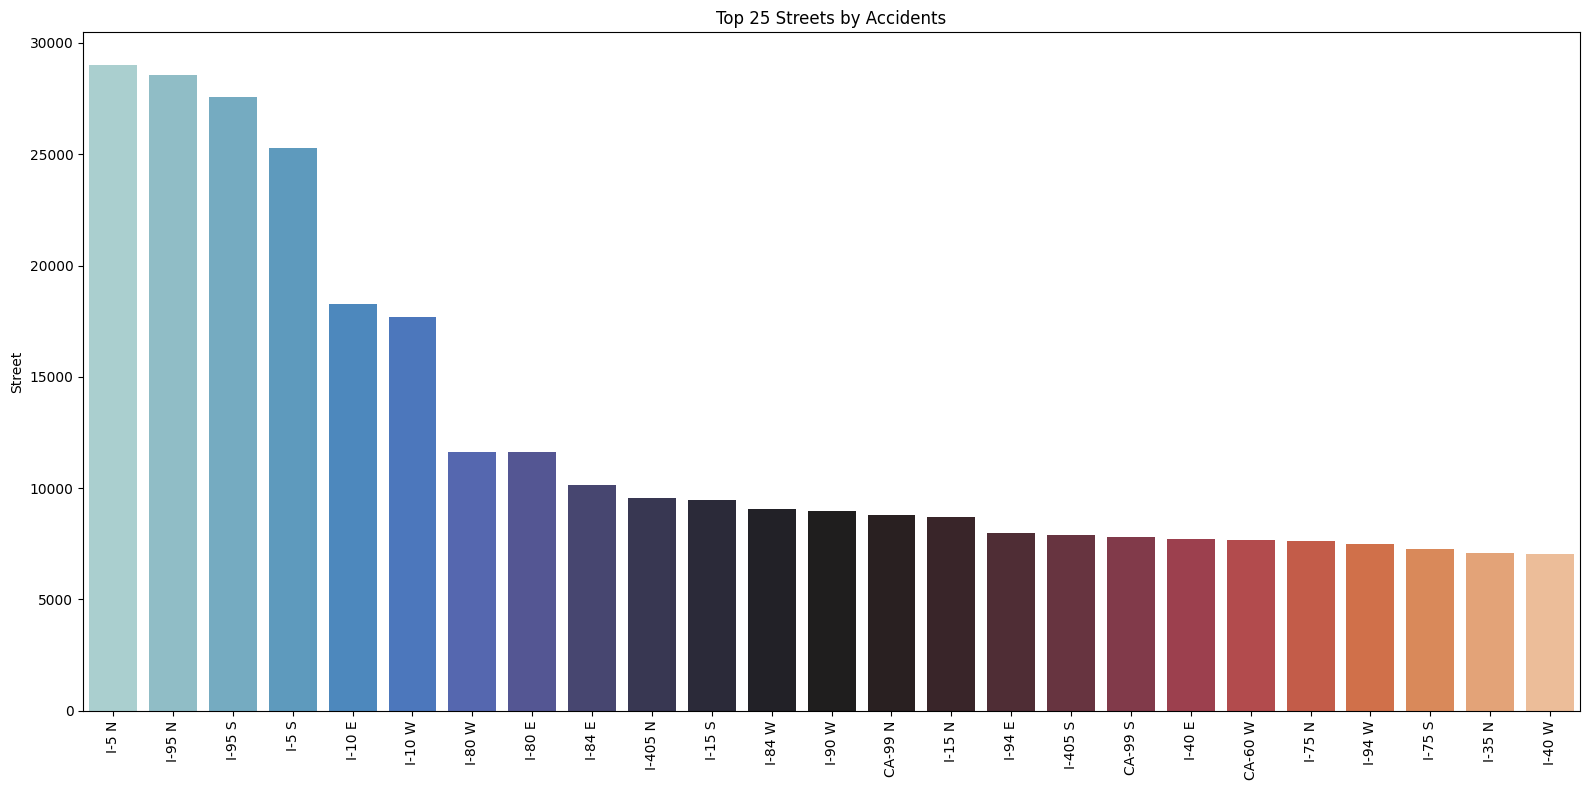

In [ ]:
street_count = data["Street"].value_counts()
print(f"Total number of streets: {len(street_count)}")
print("\nStreets with highest accidents: ")
print(street_count.head())
print("================================")
print("Streets with lowest accidents: ")
print(street_count.tail())

top25 = street_count.head(25)
plt.figure(figsize = (16, 8))
sns.barplot(x = top25.index, y = top25, palette="icefire")
plt.xticks(rotation=90)
plt.title('Top 25 Streets by Accidents')
plt.tight_layout()
plt.show()

Total number of counties: 1541

Counties with highest accidents: 
Los Angeles       163524
Miami-Dade        132288
Orange             98805
San Bernardino     44840
San Diego          38620
Name: County, dtype: int64
Counties with lowest accidents: 
Wolfe         1
New Madrid    1
Lubbock       1
Callahan      1
Walthall      1
Name: County, dtype: int64


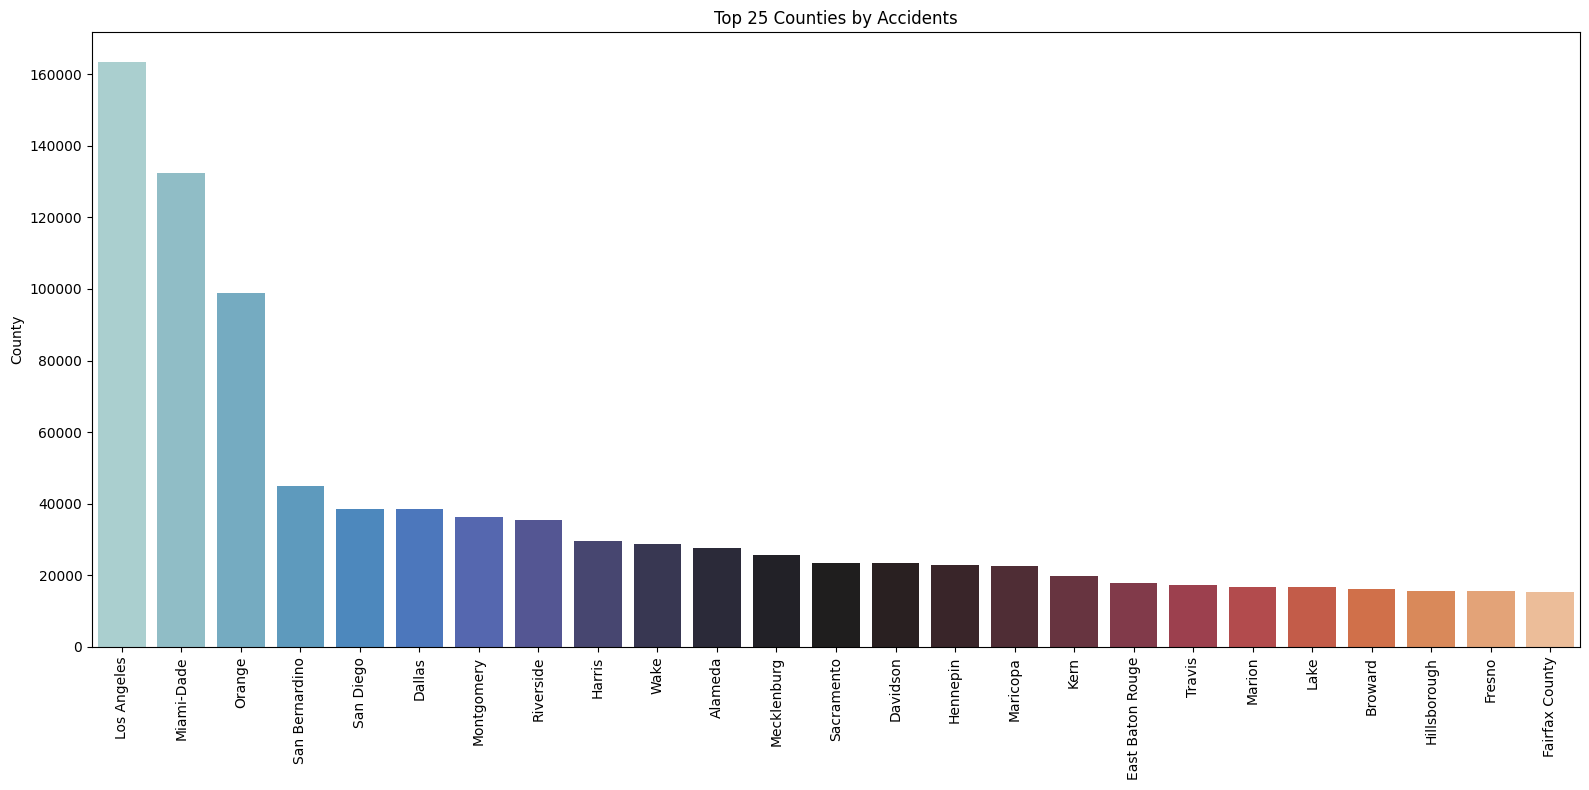

In [ ]:
county_count = data["County"].value_counts()
print(f"Total number of counties: {len(county_count)}")
print("\nCounties with highest accidents: ")
print(county_count.head())
print("================================")
print("Counties with lowest accidents: ")
print(county_count.tail())

top25 = county_count.head(25)
plt.figure(figsize = (16, 8))
sns.barplot(x = top25.index, y = top25, palette="icefire")
plt.xticks(rotation=90)
plt.title('Top 25 Counties by Accidents')
plt.tight_layout()
plt.show()

Total number of airports: 1797

Airports with highest accidents nearby: 
KCQT    43009
KMIA    41957
KOPF    35264
KORL    34843
KTMB    34142
Name: Airport_Code, dtype: int64
Airports with lowest accidents nearby: 
KHDO    1
KFEP    1
KAXO    1
KRSL    1
KICR    1
Name: Airport_Code, dtype: int64


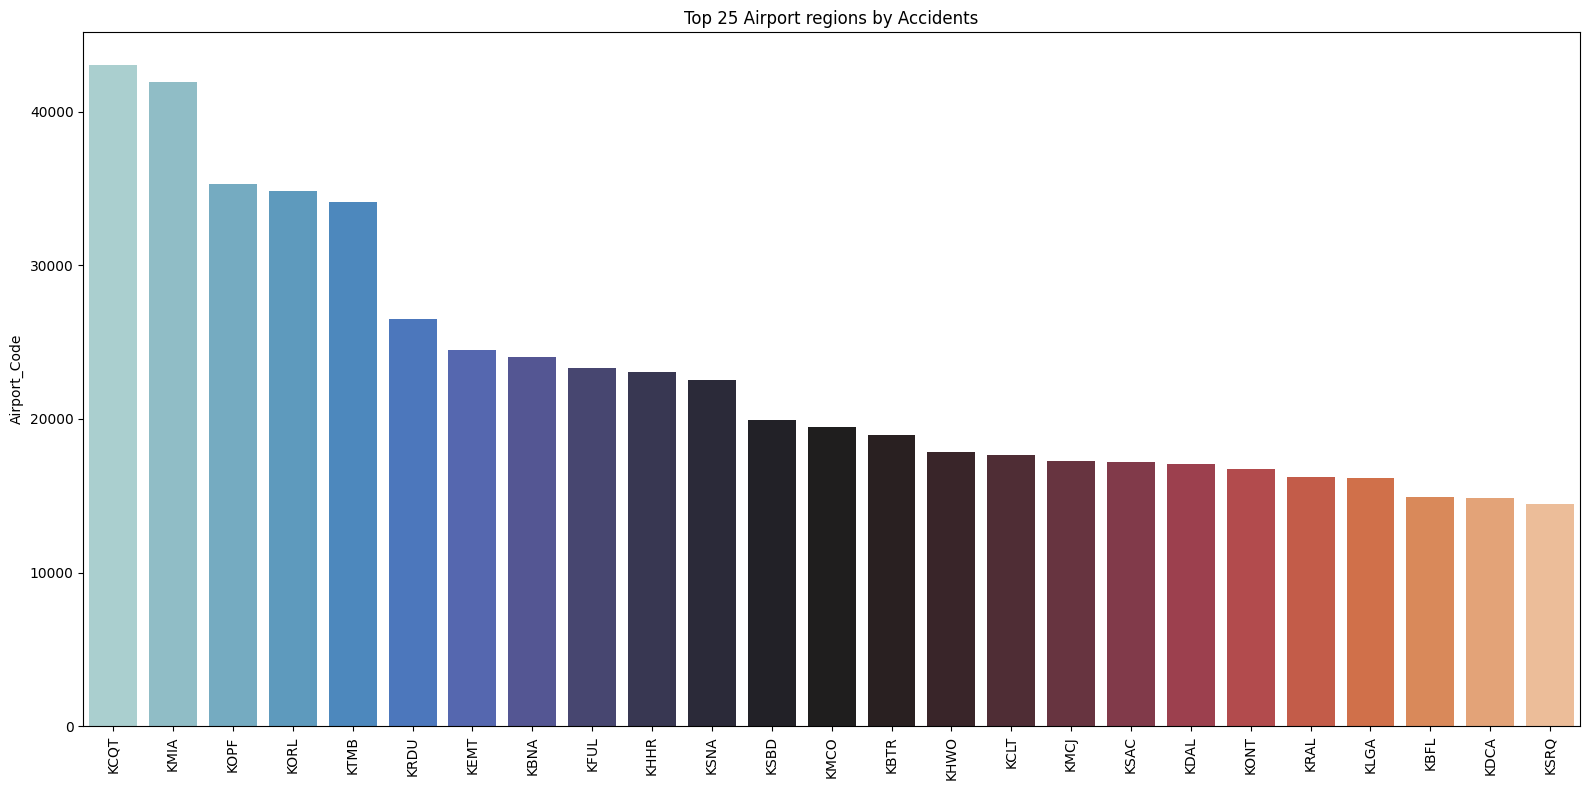

In [ ]:
Airport_count = data["Airport_Code"].value_counts()
print(f"Total number of airports: {len(Airport_count)}")
print("\nAirports with highest accidents nearby: ")
print(Airport_count.head())
print("================================")
print("Airports with lowest accidents nearby: ")
print(Airport_count.tail())

top25 = Airport_count.head(25)
plt.figure(figsize = (16, 8))
sns.barplot(x = top25.index, y = top25, palette="icefire")
plt.xticks(rotation=90)
plt.title('Top 25 Airport regions by Accidents')
plt.tight_layout()
plt.show()

Total number of weather conditions: 114

Weathers with highest accidents: 
Fair             1042415
Cloudy            334793
Mostly Cloudy     285317
Partly Cloudy     195367
Light Rain        106754
Name: Weather_Condition, dtype: int64
Weathers with lowest accidents: 
Heavy Freezing Rain               1
Heavy Freezing Drizzle            1
Heavy Rain Shower / Windy         1
Sand / Dust Whirlwinds / Windy    1
Thunder and Hail / Windy          1
Name: Weather_Condition, dtype: int64


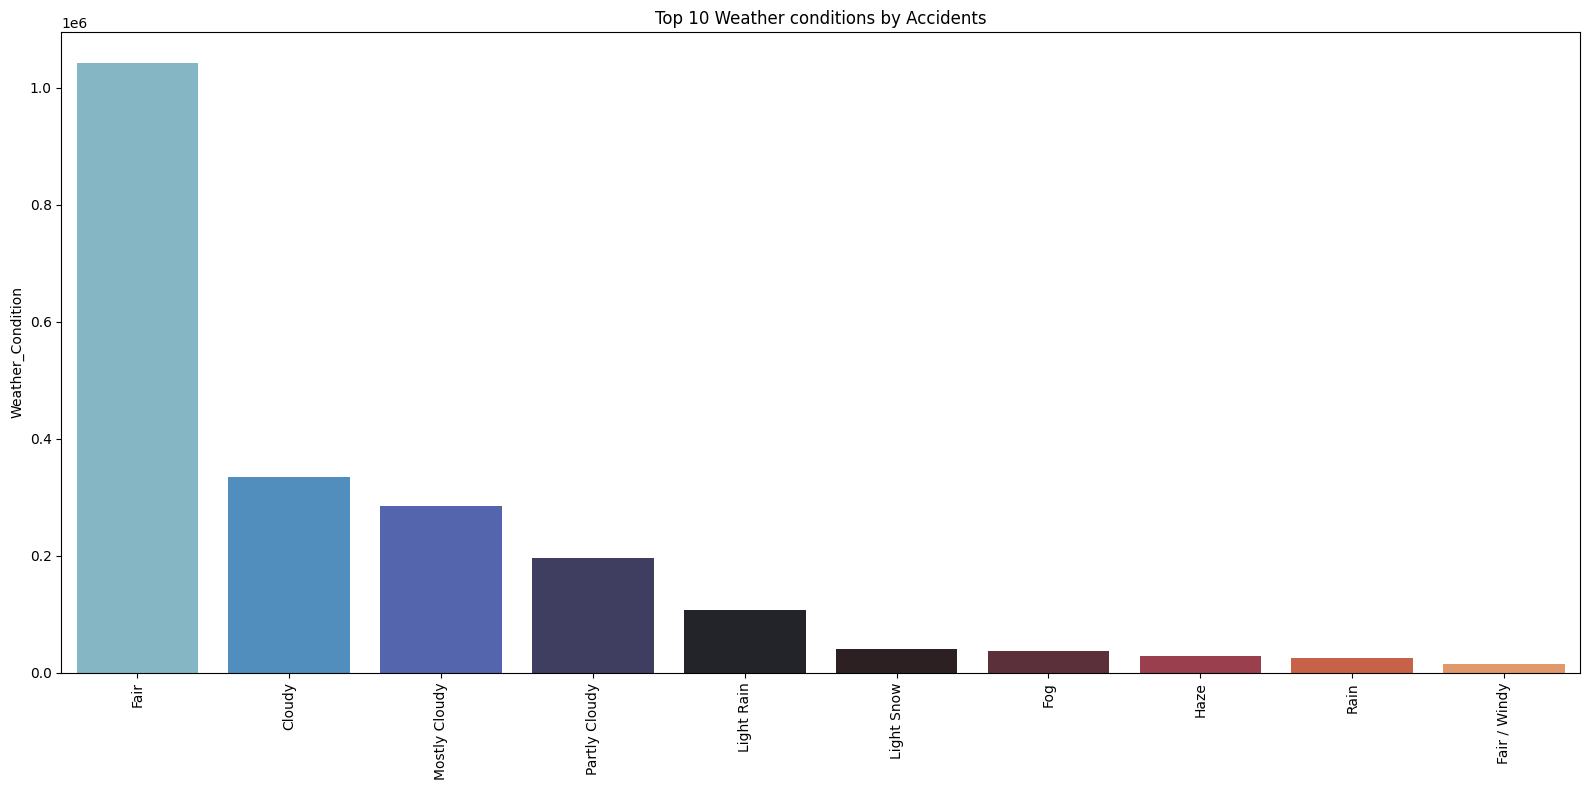

In [ ]:
weather_count = data["Weather_Condition"].value_counts()
print(f"Total number of weather conditions: {len(weather_count)}")
print("\nWeathers with highest accidents: ")
print(weather_count.head())
print("================================")
print("Weathers with lowest accidents: ")
print(weather_count.tail())

top10 = weather_count.head(10)
plt.figure(figsize = (16, 8))
sns.barplot(x = top10.index, y = top10, palette="icefire")
plt.xticks(rotation=90)
plt.title('Top 10 Weather conditions by Accidents')
plt.tight_layout()
plt.show()

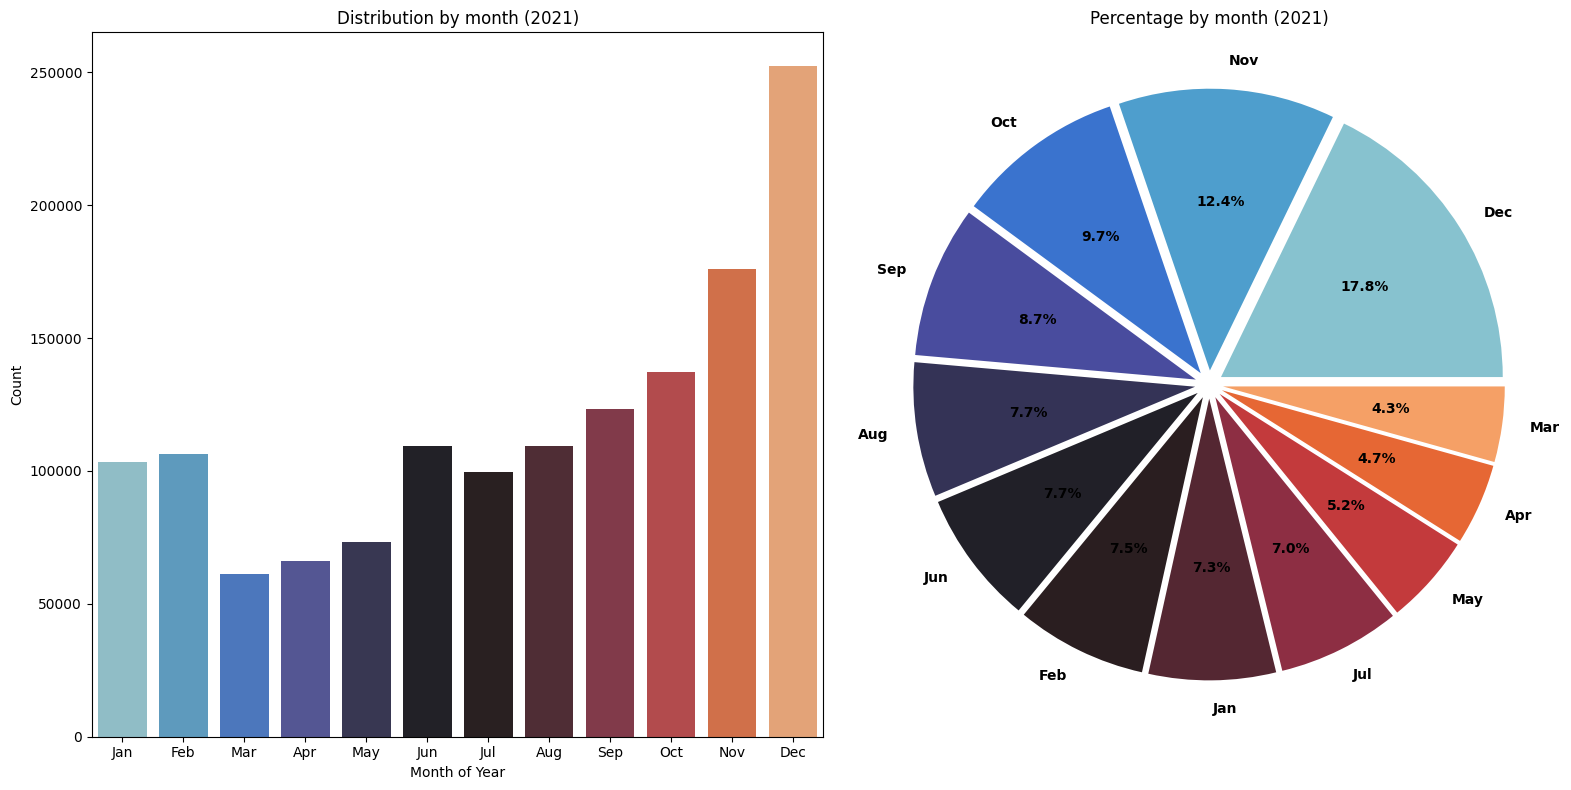

In [ ]:
data_o = data2.copy()
df_month = pd.DataFrame({'month': data_o[data_o['Start_Time'].dt.year == 2021]['Start_Time'].dt.month})
df_month['month'] = df_month['month'].apply(lambda x: calendar.month_abbr[x])
df_month['month'] = pd.Categorical(df_month['month'], categories=list(calendar.month_abbr)[1:], ordered=True)

plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(data=df_month, x='month', palette='icefire')
plt.xlabel('Month of Year')
plt.ylabel('Count')
plt.title('Distribution by month (2021)')

# pie chart
plt.subplot(122, aspect='equal')
counts = df_month['month'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()
colors = sns.color_palette('icefire', len(labels))
explode = [0.05] * len(labels)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        textprops={'fontweight': 'bold'})
plt.title('Percentage by month (2021)')
plt.tight_layout()
plt.show()

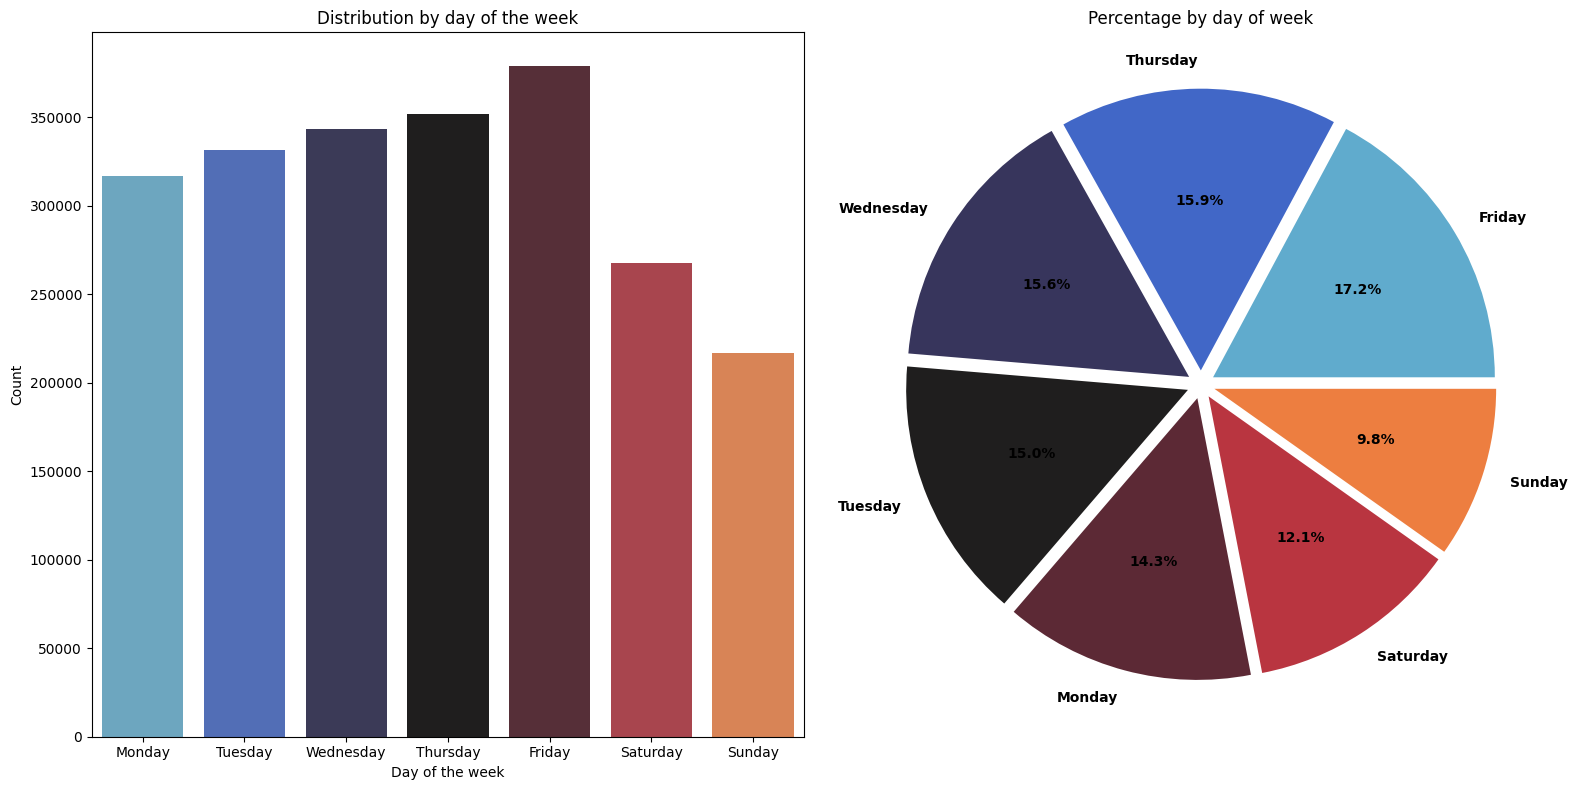

In [ ]:
data_o['Day_of_Week'] = data_o['Start_Time'].dt.day_name()
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = data_o["Day_of_Week"].value_counts()


plt.figure(figsize = (16, 8))
plt.subplot(121)
sns.countplot(data=data_o, x='Day_of_Week', order=week_order, palette='icefire')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Distribution by day of the week')

plt.subplot(122, aspect='equal')
labels = counts.index.tolist()
sizes = counts.values.tolist()
colors = sns.color_palette('icefire', len(labels))
explode = [0.05] * len(labels)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        textprops={'fontweight': 'bold'})
plt.title('Percentage by day of week')
plt.tight_layout()
plt.show()

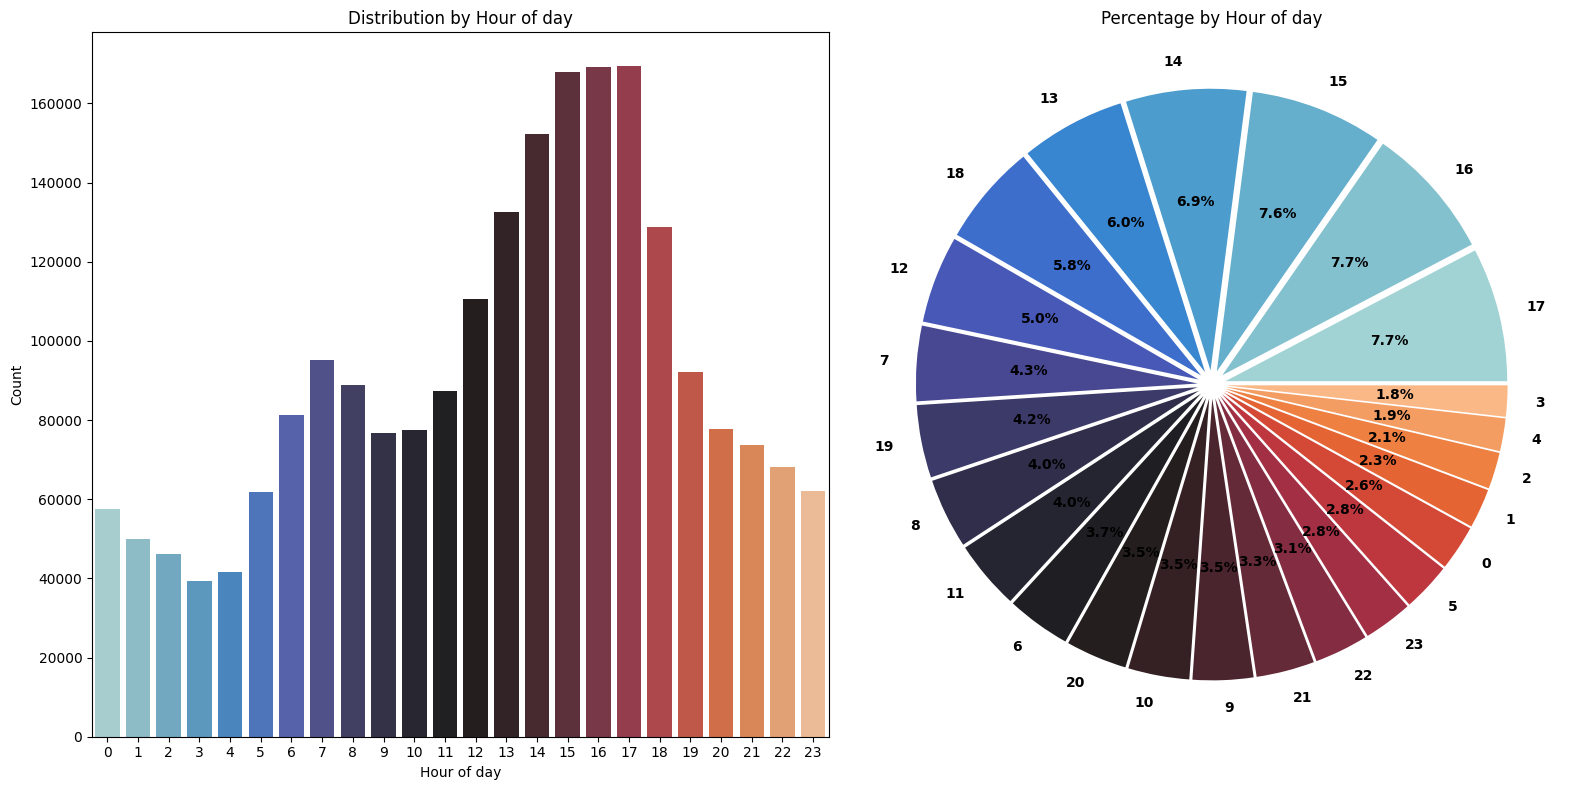

In [ ]:
data_o["hour"] = data_o["Start_Time"].dt.hour

counts = data_o["hour"].value_counts()

plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(data=data_o, x='hour', palette='icefire')
plt.xlabel('Hour of day')
plt.ylabel('Count')
plt.title('Distribution by Hour of day')

plt.subplot(122, aspect='equal')
labels = counts.index.tolist()
sizes = counts.values.tolist()
colors = sns.color_palette('icefire', len(labels))
explode = [0.05] * len(labels)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Percentage by Hour of day')
plt.tight_layout()
plt.show()

In [ ]:
df = data.copy()
categorical_columns = ['Street', 'Side', 'City', 'County', 'State', 
                       'Timezone', 'Airport_Code', 'Wind_Direction', 
                       'Weather_Condition', 'Sunrise_Sunset', 'Start_Time', 
                       'End_Time', 'Weather_Timestamp']
for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

print(df.head())

    Severity  Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0          3    40.1089   -83.0929  40.1121 -83.0319        3.2300   
4          3    39.1724   -84.4928  39.1705 -84.5018        0.5000   
7          2    41.3753   -81.8202  41.3679 -81.8217        0.5210   
9          2    40.1093   -82.9685  40.1108 -82.9840        0.8260   
10         2    39.1929   -84.4772  39.1962 -84.4733        0.3070   

    Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  ...  Side  City  \
0          42.1000        36.1000      58.0000       29.7600  ...     1  2324   
4          37.0000        29.8000      93.0000       29.6900  ...     1  1569   
7          33.1000        30.0000      92.0000       29.6300  ...     1  1639   
9          32.0000        28.7000     100.0000       29.5900  ...     1  9374   
10         33.8000        29.6000     100.0000       29.6600  ...     1  1569   

    County  State  Timezone  Airport_Code  Weather_Timestamp  Wind_Direction  \
0      495  

Number of Severity types: 4
2    2057075
3      64588
4      62106
1      23556
Name: Severity, dtype: int64


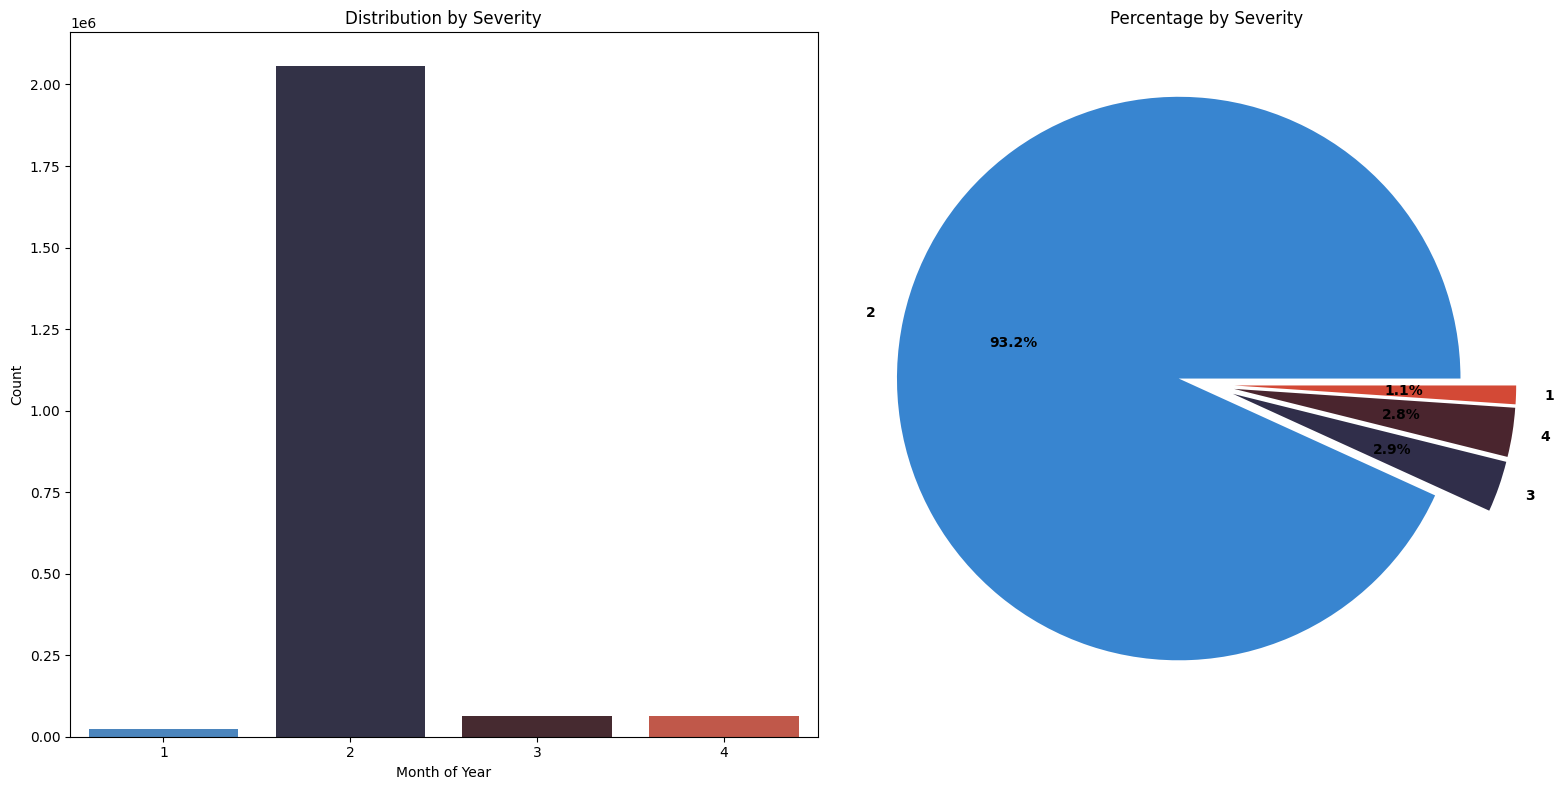

In [ ]:
counts = df['Severity'].value_counts()
print(f"Number of Severity types: {len(counts)}")
print(counts)

plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(data=df, x='Severity', palette='icefire')
plt.xlabel('Month of Year')
plt.ylabel('Count')
plt.title('Distribution by Severity')

plt.subplot(122, aspect='equal')
labels = counts.index.tolist()
sizes = counts.values.tolist()
colors = sns.color_palette('icefire', len(labels))
explode = [0.1] * len(labels)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        textprops={'fontweight': 'bold'})
plt.title('Percentage by Severity')
plt.tight_layout()
plt.show()

In [ ]:
limit_data = df.sample(frac=.20)

In [ ]:
y = limit_data['Severity'].copy()
X = limit_data.drop('Severity', axis=1).copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=6313)
print(f'Train data: {X_train.shape}')
print(f'Test data: {X_test.shape}')

Train data: (353172, 25)
Test data: (88293, 25)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create logistic regression classifier
lr = LogisticRegression(random_state=42)

# Train the model on the preprocessed training data
lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
dtc.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = dtc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the preprocessed training data
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the preprocessed training data
rfc.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95
